<a href="https://colab.research.google.com/github/rafysp/PCVK_Ganjil_23-24/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google
colab:

 Mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukkan nilai kecerahan: 50


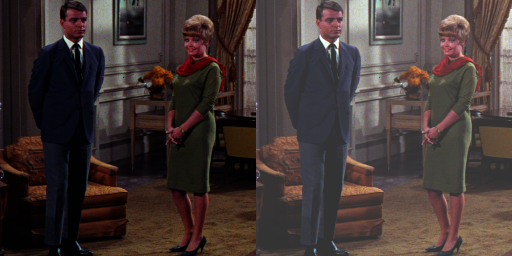

In [15]:
print(' Mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convrtScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori

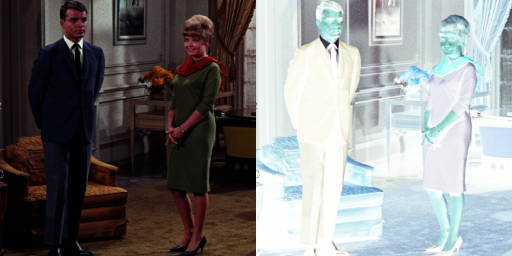

In [16]:
invers = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      invers[y,x,c] = np.clip(255 - original[y,x,c], 0, 255)

final_frame = cv.hconcat((original, invers))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan[-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


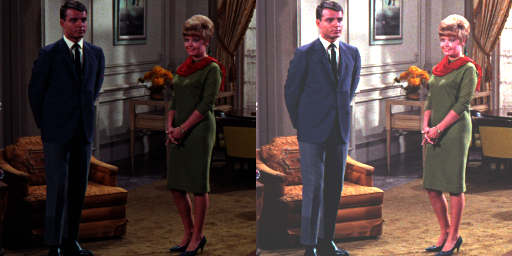

In [17]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan[-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


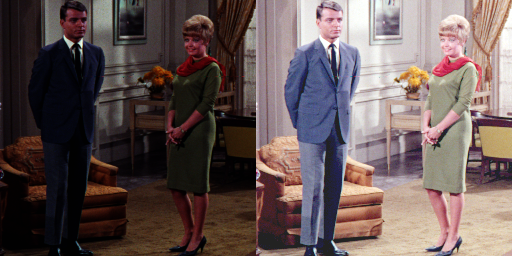

In [18]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/couple.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori

a. Averaging

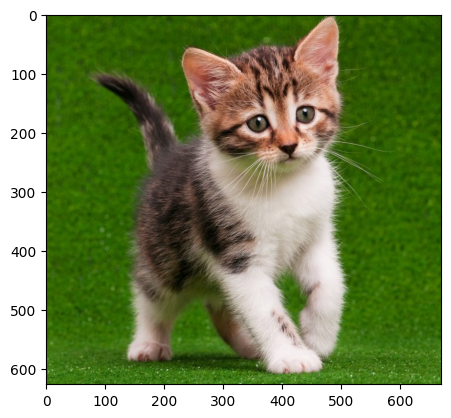

In [28]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/kitten01.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

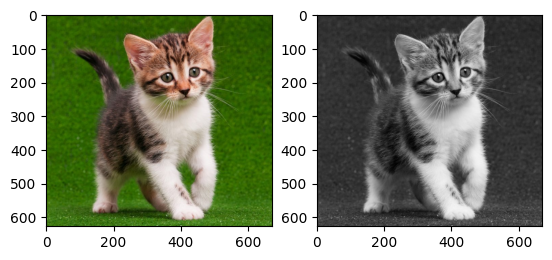

In [29]:
img_avg = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/kitten01.jpg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

b. Lightness

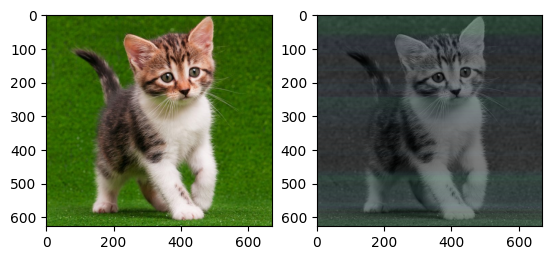

In [30]:
img_light = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/kitten01.jpg')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)


c. Luminance

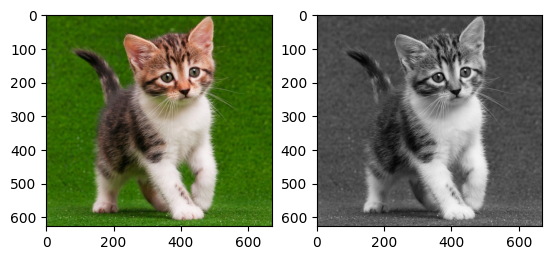

In [31]:
img_lum = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/kitten01.jpg')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna merah menjadi grayscale seperti pada contoh berikut:

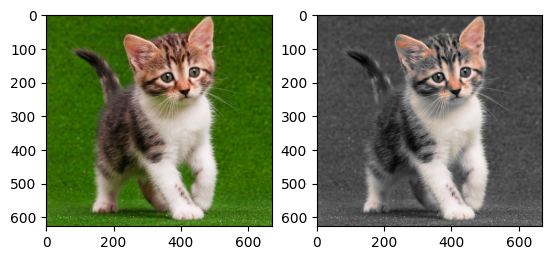

In [32]:
img = cv.imread('/content/drive/MyDrive/Pengolahan Citra dan Komputer Vision/Images/kitten01.jpg')
ret, mask = cv.threshold(img [:,:,2], 180, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
gray = cv.bitwise_and(img, 255 - mask3)
out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')